In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [5]:
data = pd.read_excel("results/test_result_VAE_output.xlsx")

In [6]:
data.head()

,source,source_country,destination,destination_country,distance,transportation_mode,emission,vae_output
0,Madrid,Spain,Zurich,Switzerland,1247.170000,Heavy Truck,62.358500,"{'distance': 1902.85, 'emission': 106.97, 'mod..."
1,Brussels,Belgium,Warsaw,Poland,1159.770000,Heavy Truck,57.988500,"{'distance': 1419.82, 'emission': 88.55, 'mode..."
2,Caguas,puerto rico,Villahermosa,mexico,2810.273673,Air Freight,1489.445047,"{'distance': 1256.61, 'emission': 263.29, 'mod..."
3,Saint Charles,ee. uu.,Los Angeles,united states of america,3386.713111,Air Freight,1794.957949,"{'distance': 2512.48, 'emission': 433.89, 'mod..."
4,Madrid,Spain,Istanbul,Turkey,3585.000000,Air Freight,2151.000000,"{'distance': 2420.39, 'emission': 486.64, 'mod..."


In [7]:
 # Convert string dicts to real Python dicts
data['vae_output'] = data['vae_output'].apply(lambda x: ast.literal_eval(x))

# Extract into new columns
data['vae_distance'] = data['vae_output'].apply(lambda x: x['distance'])
data['vae_emission'] = data['vae_output'].apply(lambda x: x['emission'])

# Some rows may use 'mode' key, others 'transportation_mode'
data['vae_mode'] = data['vae_output'].apply(
    lambda x: x.get('mode') if 'mode' in x else x.get('transportation_mode')
)


In [8]:
data.head()

,source,source_country,destination,destination_country,distance,transportation_mode,emission,vae_output,vae_distance,vae_emission,vae_mode
0,Madrid,Spain,Zurich,Switzerland,1247.170000,Heavy Truck,62.358500,"{'distance': 1902.85, 'emission': 106.97, 'mod...",1902.85,106.97,Cargo Train
1,Brussels,Belgium,Warsaw,Poland,1159.770000,Heavy Truck,57.988500,"{'distance': 1419.82, 'emission': 88.55, 'mode...",1419.82,88.55,Cargo Train
2,Caguas,puerto rico,Villahermosa,mexico,2810.273673,Air Freight,1489.445047,"{'distance': 1256.61, 'emission': 263.29, 'mod...",1256.61,263.29,Cargo Train
3,Saint Charles,ee. uu.,Los Angeles,united states of america,3386.713111,Air Freight,1794.957949,"{'distance': 2512.48, 'emission': 433.89, 'mod...",2512.48,433.89,Container Ship
4,Madrid,Spain,Istanbul,Turkey,3585.000000,Air Freight,2151.000000,"{'distance': 2420.39, 'emission': 486.64, 'mod...",2420.39,486.64,Cargo Train


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   source               14 non-null     object 
 1   source_country       14 non-null     object 
 2   destination          14 non-null     object 
 3   destination_country  14 non-null     object 
 4   distance             14 non-null     float64
 5   transportation_mode  14 non-null     object 
 6   emission             14 non-null     float64
 7   vae_output           14 non-null     object 
 8   vae_distance         14 non-null     float64
 9   vae_emission         14 non-null     float64
 10  vae_mode             14 non-null     object 
 11  distance_diff_pct    14 non-null     float64
 12  emission_diff_pct    14 non-null     float64
dtypes: float64(6), object(7)
memory usage: 1.5+ KB


In [10]:
data['distance_diff_pct'] = (
    (data['vae_distance'] - data['distance']) / data['distance']
) * 100

data['emission_diff_pct'] = (
    (data['vae_emission'] - data['emission']) / data['emission']
) * 100

In [11]:
# Create a formatted comparison table with averages

# Select relevant columns
comparison_table = data[['source','destination',
                         'distance','vae_distance','distance_diff_pct',
                         'emission','vae_emission','emission_diff_pct']].copy()

# Round for neatness
comparison_table = comparison_table.round({
    'distance':2,'vae_distance':2,'distance_diff_pct':1,
    'emission':2,'vae_emission':2,'emission_diff_pct':1
})

# Add average row
avg_row = {
    'source':'--AVERAGE--',
    'destination':'',
    'distance': round(data['distance'].mean(),2),
    'vae_distance': round(data['vae_distance'].mean(),2),
    'distance_diff_pct': round(data['distance_diff_pct'].mean(),1),
    'emission': round(data['emission'].mean(),2),
    'vae_emission': round(data['vae_emission'].mean(),2),
    'emission_diff_pct': round(data['emission_diff_pct'].mean(),1)
}

comparison_table = pd.concat([comparison_table, pd.DataFrame([avg_row])], ignore_index=True)

# Display
print(comparison_table)


           source   destination  distance  vae_distance  distance_diff_pct  \
0          Madrid        Zurich   1247.17       1902.85               52.6   
1        Brussels        Warsaw   1159.77       1419.82               22.4   
2          Caguas  Villahermosa   2810.27       1256.61              -55.3   
3   Saint Charles   Los Angeles   3386.71       2512.48              -25.8   
4          Madrid      Istanbul   3585.00       2420.39              -32.5   
5          Lisbon        London   2197.00       1446.70              -34.2   
6           Milan     Barcelona    979.00       1446.70               47.8   
7        New York        London   5567.00       3949.14              -29.1   
8      Copenhagen     Stockholm    522.00        521.53               -0.1   
9           Miami        Madrid   7100.00       5086.28              -28.4   
10          Paris        Berlin    878.00        704.82              -19.7   
11         London     Amsterdam    360.00        507.09         

In [12]:
comparison_table.to_excel("results/vae_outputs/comparison_table.xlsx")

In [13]:
# Cross-tabulate original vs VAE mode
mode_comparison = pd.crosstab(
    data['transportation_mode'],
    data['vae_mode'],
    rownames=['Original Mode'],
    colnames=['VAE Mode']
)

# Percentage version
mode_comparison_pct = mode_comparison.div(mode_comparison.sum(axis=1), axis=0) * 100

print(mode_comparison)
print(mode_comparison_pct.round(1))

VAE Mode       Cargo Train  Container Ship
Original Mode                             
Air Freight              7               3
Heavy Truck              3               1
VAE Mode       Cargo Train  Container Ship
Original Mode                             
Air Freight           70.0            30.0
Heavy Truck           75.0            25.0


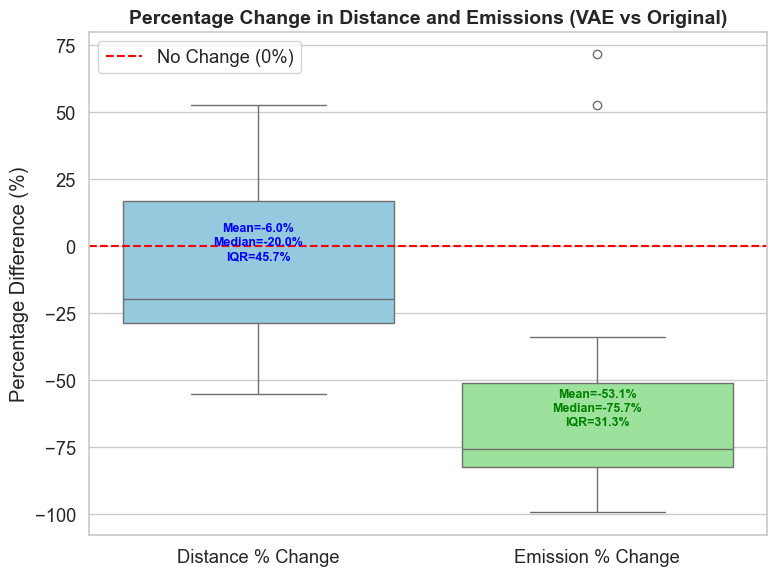

In [23]:

import numpy as np
# Ensure seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# --- Calculate summary stats ---
dist_mean = data['distance_diff_pct'].mean()
dist_median = data['distance_diff_pct'].median()
dist_iqr = np.percentile(data['distance_diff_pct'], 75) - np.percentile(data['distance_diff_pct'], 25)

emis_mean = data['emission_diff_pct'].mean()
emis_median = data['emission_diff_pct'].median()
emis_iqr = np.percentile(data['emission_diff_pct'], 75) - np.percentile(data['emission_diff_pct'], 25)

# --- Plot boxplots ---
plt.figure(figsize=(8,6))
sns.boxplot(data=[data['distance_diff_pct'], data['emission_diff_pct']],
            palette=["skyblue","lightgreen"])

# Labels & title
plt.xticks([0,1], ['Distance % Change','Emission % Change'])
plt.title("Percentage Change in Distance and Emissions (VAE vs Original)", fontsize=14, weight="bold")
plt.ylabel("Percentage Difference (%)")

# Reference line at 0 (no change)
plt.axhline(0, color="red", linestyle="--", label="No Change (0%)")

# --- Add text annotations ---
plt.text(0, dist_mean, f"Mean={dist_mean:.1f}%\nMedian={dist_median:.1f}%\nIQR={dist_iqr:.1f}%",
         ha="center", va="bottom", fontsize=9, color="blue", weight="bold")

plt.text(1, emis_mean, f"Mean={emis_mean:.1f}%\nMedian={emis_median:.1f}%\nIQR={emis_iqr:.1f}%",
         ha="center", va="top", fontsize=9, color="green", weight="bold")

plt.legend()
plt.tight_layout()
plt.savefig("inference.png", dpi=300)
plt.show()


In [18]:
import plotly.graph_objects as go

mode_comparison = pd.crosstab(data['transportation_mode'], data['vae_mode'])

sources = []
targets = []
values = []

original_modes = mode_comparison.index.tolist()
vae_modes = mode_comparison.columns.tolist()

# Build flows
for i, o_mode in enumerate(original_modes):
    for j, v_mode in enumerate(vae_modes):
        val = mode_comparison.loc[o_mode, v_mode]
        if val > 0:
            sources.append(i)
            targets.append(len(original_modes) + j)
            values.append(val)

labels = original_modes + vae_modes
colors = ["#FF9999"]*len(original_modes) + ["#99CCFF"]*len(vae_modes)

fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(title_text="Mode Mapping: Original → VAE", font_size=12)
fig.show()


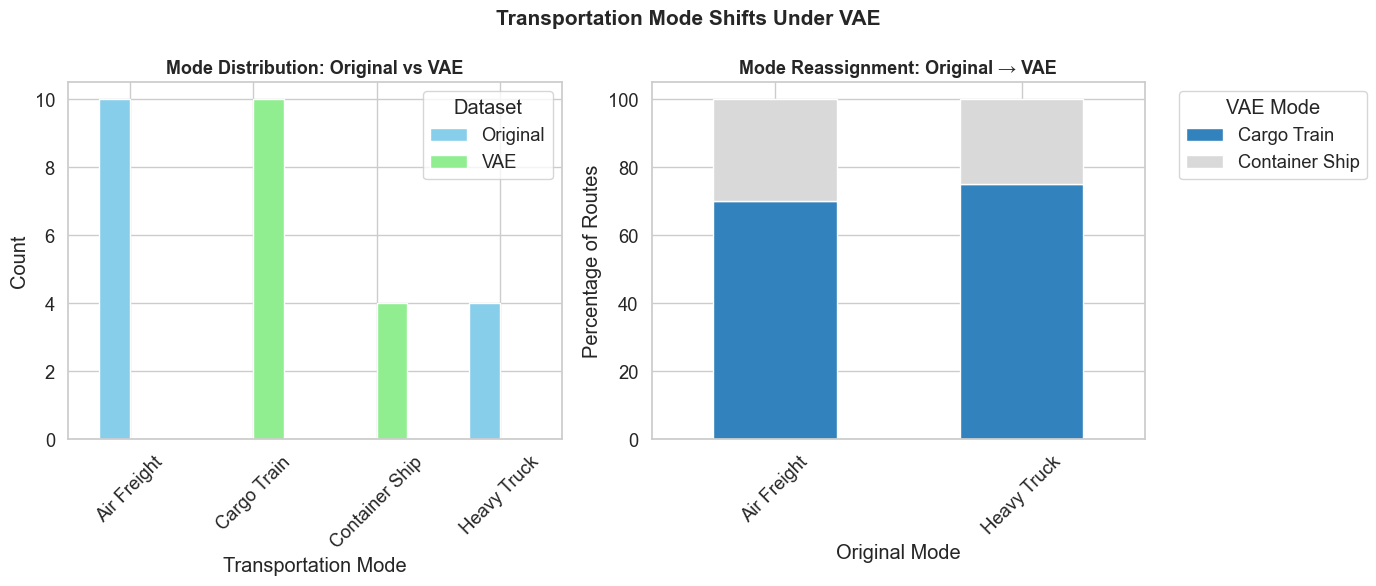

In [24]:
import matplotlib.pyplot as plt

# -------------------------------
# Data prep
# -------------------------------
# Counts for grouped bar plot
orig_counts = data['transportation_mode'].value_counts()
vae_counts = data['vae_mode'].value_counts()

mode_counts = pd.DataFrame({'Original': orig_counts, 'VAE': vae_counts}).fillna(0)

# Percentages for stacked bar plot
mode_mapping_pct = pd.crosstab(
    data['transportation_mode'],
    data['vae_mode'],
    normalize='index'
) * 100

# -------------------------------
# Plot
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Grouped bar plot
mode_counts.plot(kind='bar', ax=axes[0], color=['skyblue','lightgreen'])
axes[0].set_title("Mode Distribution: Original vs VAE", fontsize=13, weight="bold")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Transportation Mode")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Dataset")

# Stacked bar plot
mode_mapping_pct.plot(
    kind='bar', stacked=True, ax=axes[1], colormap="tab20c"
)
axes[1].set_title("Mode Reassignment: Original → VAE", fontsize=13, weight="bold")
axes[1].set_ylabel("Percentage of Routes")
axes[1].set_xlabel("Original Mode")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="VAE Mode", bbox_to_anchor=(1.05,1), loc='upper left')

plt.suptitle("Transportation Mode Shifts Under VAE", fontsize=15, weight="bold")
plt.tight_layout()
plt.savefig("inference2.png", dpi=300)
plt.show()


In [21]:

mode_counts_table = pd.DataFrame({
    "Original Count": orig_counts,
    "VAE Count": vae_counts
}).fillna(0).astype(int)

# Compute percentage change safely
def safe_pct_change(row):
    if row["Original Count"] == 0 and row["VAE Count"] > 0:
        return "Newly Introduced"
    elif row["Original Count"] == 0 and row["VAE Count"] == 0:
        return "No Change"
    else:
        return f"{((row['VAE Count'] - row['Original Count']) / row['Original Count'] * 100):.1f}%"

mode_counts_table["% Change"] = mode_counts_table.apply(safe_pct_change, axis=1)

print(mode_counts_table)


                Original Count  VAE Count          % Change
Air Freight                 10          0           -100.0%
Cargo Train                  0         10  Newly Introduced
Container Ship               0          4  Newly Introduced
Heavy Truck                  4          0           -100.0%


In [25]:
## Inference 2

In [28]:
data_routes = pd.read_excel("results/generated_routes/test_result_routes_generated.xlsx")

In [29]:
data_routes.head()

,Route_Rank,Source,Destination,Predicted Distance (km),Predicted Emission (kg CO₂),Real Distance (km),Real Emission (kg CO₂),Distance Valid,Emission Valid,Overall Status,Route Summary
0,1,Madrid,Zurich,1902.85,106.97,1543,52.27,True,True,valid,"Madrid→Barcelona (Cargo Train, 621 km, 31.05 k..."
1,2,Madrid,Zurich,1902.85,106.97,1585,77.75,True,True,valid,"Madrid→Lyon (Cargo Train, 1035 km, 51.75 kg) |..."
2,3,Madrid,Zurich,1902.85,106.97,1640,82.00,True,True,valid,"Madrid→Barcelona (Cargo Train, 620 km, 31.0 kg..."
3,1,Brussels,Warsaw,1419.82,88.55,1359,67.95,True,True,valid,"Brussels→Cologne (Cargo Train, 211 km, 10.55 k..."
4,2,Brussels,Warsaw,1419.82,88.55,1360,68.00,True,True,valid,"Brussels→Cologne (Cargo Train, 213 km, 10.65 k..."


In [32]:
# Count valid vs invalid
validity_counts = data_routes['Overall Status'].value_counts()

# Build comparison table
validity_table = pd.DataFrame({
    "Count": validity_counts,
    "Percentage": (validity_counts / len(data_routes) * 100).round(1)
})

print(validity_table)

                Count  Percentage
Overall Status                   
valid              29        69.0
invalid            13        31.0


In [39]:
# Filter only rank 1 routes
rank1_routes = data_routes[data_routes['Route_Rank'] == 1]

# Count valid vs invalid among rank 1
rank1_validity = rank1_routes['Overall Status'].value_counts()

# Build summary table
rank1_summary = pd.DataFrame({
    "Count": rank1_validity,
    "Percentage": (rank1_validity / len(rank1_routes) * 100).round(1)
})

print("Rank 1 Routes between source & destination (validity check):")
print(rank1_summary)

# Also show the full table of all rank 1 routes with their status
print("\nAll Rank 1 routes with validity:")
print(rank1_routes[['Source','Destination','Predicted Distance (km)','Real Distance (km)',
                    'Predicted Emission (kg CO₂)','Real Emission (kg CO₂)','Overall Status']])


Rank 1 Routes between source & destination (validity check):
                Count  Percentage
Overall Status                   
valid              12        85.7
invalid             2        14.3

All Rank 1 routes with validity:
           Source   Destination  Predicted Distance (km)  Real Distance (km)  \
0          Madrid        Zurich                  1902.85                1543   
3        Brussels        Warsaw                  1419.82                1359   
6   Saint Charles   Los Angeles                  2512.48                2512   
9          Madrid      Istanbul                  2420.39                2420   
12         Lisbon        London                  1446.70                2043   
15          Milan     Barcelona                  1446.70                 890   
18         Caguas  Villahermosa                  1256.61                1230   
21         Madrid      Istanbul                  2420.39                2420   
24     Copenhagen     Stockholm                  

In [37]:
print("Rank 1 Routes between source & destination (validity check):")
rank1_summary.to_excel("results/generated_routes/rank1_summary.xlsx", index=False)


Rank 1 Routes between source & destination (validity check):


In [38]:
rnk1 = rank1_routes[['Source','Destination','Predicted Distance (km)','Real Distance (km)',
                    'Predicted Emission (kg CO₂)','Real Emission (kg CO₂)','Overall Status']]
rnk1.to_excel("results/generated_routes/rnk1.xlsx", index=False)

/var/folders/s8/4scm1fp51jxb452fhj6kc_bc0000gn/T/ipykernel_76113/3552140135.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s8/4scm1fp51jxb452fhj6kc_bc0000gn/T/ipykernel_76113/3552140135.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



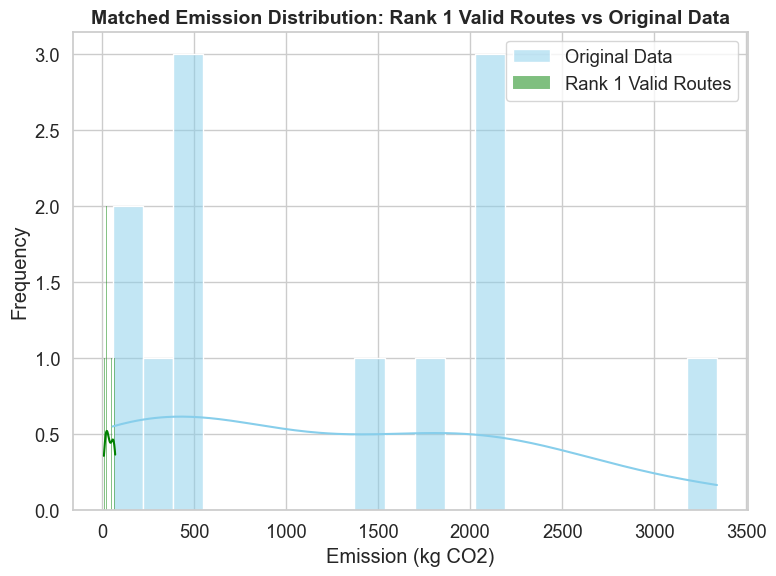

In [51]:
# 1. Filter Rank 1 valid routes from the new dataset
rank1_valid_routes = data_routes[(data_routes['Route_Rank'] == 1) & (data_routes['Overall Status'] == 'valid')]
real_emission_rank1 = rank1_valid_routes['Real Emission (kg CO₂)']

# 2. Load the previous original dataset (with 'emission' column)

# Ensure comparable types (string trim/normalize if needed)
rank1_valid_routes['Source'] = rank1_valid_routes['Source'].str.strip()
rank1_valid_routes['Destination'] = rank1_valid_routes['Destination'].str.strip()
data['source'] = data['source'].str.strip()
data['destination'] = data['destination'].str.strip()

# 3. Match routes by Source & Destination
merged = pd.merge(
    rank1_valid_routes,
    data,
    left_on=['Source','Destination'],
    right_on=['source','destination'],
    how='inner'
)


# 3. Combine into one dataframe for plotting
real_emission_rank1 = merged['Real Emission (kg CO₂)']
original_emission_matched = pd.to_numeric(merged['emission'], errors='coerce')

# 5. Plot histogram overlay
plt.figure(figsize=(8,6))
sns.histplot(original_emission_matched, bins=20, color="skyblue", label="Original Data", kde=True, alpha=0.5)
sns.histplot(real_emission_rank1, bins=20, color="green", label="Rank 1 Valid Routes", kde=True, alpha=0.5)

plt.title("Matched Emission Distribution: Rank 1 Valid Routes vs Original Data", fontsize=14, weight="bold")
plt.xlabel("Emission (kg CO2)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("inference3.png", dpi=300)
plt.show()



In [50]:
# 6. Calculate averages + % reduction
avg_rank1 = real_emission_rank1.mean()
avg_original = original_emission_matched.mean()
pct_reduction = ((avg_original - avg_rank1) / avg_original) * 100

print("Average Emission (Rank 1 Valid Routes):", round(avg_rank1,2))
print("Average Emission (Original Data, matched):", round(avg_original,2))
print("Percentage Reduction:", round(pct_reduction,1), "%")

Average Emission (Rank 1 Valid Routes): 41.52
Average Emission (Original Data, matched): 1246.22
Percentage Reduction: 96.7 %
